## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Time influence](#time)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [219]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [220]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [221]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [222]:
# Add unique users to variable unique_users
unique_users = df['user_id'].unique()

# Count unique_users
unique_users.size

290584

d. The proportion of users converted.

In [223]:
# Add unique converted users to variable converted
converted = df.query('converted == 1').user_id.unique()

# Calculate the proportion 
converted.size/unique_users.size

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [224]:
var1 = df.query('landing_page == "new_page" and group != "treatment"').count()
var2 = df.query('group == "treatment" and landing_page != "new_page"').count()

var1 + var2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [226]:
# Identify rows with wrong data
var1 = df.query('landing_page == "new_page" and group != "treatment"')
var2 = df.query('group == "treatment" and landing_page != "new_page"')
var3 = df.query('landing_page == "old_page" and group != "control"')
var4 = df.query('group == "control" and landing_page != "old_page"')

# Add rows with wrong data to a dataframe named result
frames = [var1, var2, var3, var4]

result = pd.concat(frames)

print(result.shape)
result.head()

(7786, 5)


,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1


In [227]:
# Drop result rows from df
df2 = df

cond = df2.index.isin(result.index)

df2.drop(df2[cond].index, inplace = True)

In [228]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [229]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [230]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [231]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [232]:
# Shown above...

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [233]:
df2 = df2.loc[~df2.duplicated(['user_id'], keep='first')]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [234]:
df2.query('converted == 1').count()/df2.shape[0]

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [235]:
df2.query('converted == 1 and group == "control"').count()/df2.query('group == "control"').count()

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [236]:
df2.query('group == "treatment" and converted == 1').count()/df2.query('group == "treatment"').count()

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [237]:
df2.query('landing_page == "new_page"').count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** The probability of conversion given that the individual was in the control group is 0.12 and, the probability of conversion for an individual in the treatment group is 0.11. The groups are almost the same size, the probability of receiving a new page is 0.500062. Given all the probabilities above, there is no sufficient evidence to say that the new treatment page leads to more conversions, moreover, statistically, the new page leads to fewer conversions than the old page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** 

*Null hypothesis* - The new page conversion rate is equal or smaller than the old page. **$p_{new}$** <= **$p_{old}$**

*Alternative hypothesis* - The new page conversion rate is greater than the old page. 
**$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [238]:
# Under the Null Hypothesis, P new and P old both have convert rates equal to convert success
# rates regardless of page. 

df2.query('converted == 1').user_id.nunique()/df2['user_id'].nunique()


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [239]:
# Under the Null Hypothesis, P new and P old both have convert rates equal to convert success
# rates regardless of page. 

df2.query('converted == 1').user_id.nunique()/df2['user_id'].nunique()

0.11959708724499628

c. What is $n_{new}$?

In [240]:
# The sample size should be equal to the one in ab_data.csv. 

df2.query('group == "treatment"').user_id.size

145310

d. What is $n_{old}$?

In [241]:
# The sample size should be equal to the one in ab_data.csv. 

df2.query('group == "control"').user_id.size

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [242]:
# Random simulation of ones and zeros with the probability of true (one) equal to 0.1196.

new_page_converted = np.random.choice([0,1], size=145310, p=[1-0.1196, 0.1196])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [243]:
# Random simulation of ones and zeros with the probability of true (one) equal to 0.1196.

old_page_converted = np.random.choice([0,1], size=145274, p=[1-0.1196, 0.1196])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [244]:
# Calculate the difference in the means of old_page and new_page simulations. 

new_page_converted.mean() - old_page_converted.mean()

0.0005210100648330579

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [245]:
# Sampling distribution for the difference in converted between the two pages.
p_diffs = []
old_page_arr = []
new_page_arr = []

for _ in range(10000):
    old_page = np.random.choice([0,1], size = 145274, p=[1-0.1196, 0.1196]).mean()
    old_page_arr.append(old_page)
    new_page = np.random.choice([0,1], size = 145310, p=[1-0.1196, 0.1196]).mean()
    new_page_arr.append(new_page)
    p_diffs.append(new_page - old_page)
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

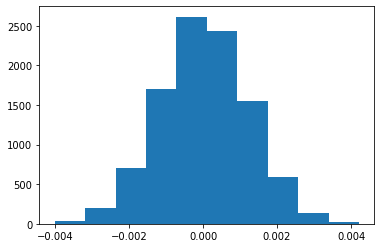

In [246]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [247]:
# Difference in prob of ab_data.csv (new - old)
ab_diff = (0.118808 - 0.120386)

# Difference between p_diffs and ab_diff - P-Value
(p_diffs > ab_diff).mean()

0.9087

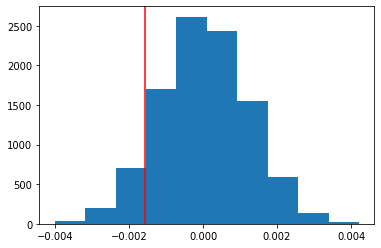

In [248]:
plt.hist(p_diffs);
plt.axvline(x=ab_diff, c='red')

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** 

Firstly, I calculated the difference between the new and old pages' conversion rates. Secondly, I did a test to verify if the difference between new and old pages means is zero when we randomly generate the values. It must be zero to fit the Null Hypothesis (new and old pages both have the same conversion rate). Then, I simulated 10.000 iterations for the difference between the two pages means when calculating an estimate from the Null Hypothesis. Finally, comparing the sampling distribution from the Null Hypothesis to the difference between the new and old pages I found out that the p-value is 0.9095. The p-value is the probability of obtaining the observed statistic extreme in favor of the Alternative Hypothesis. Based on this, we should not reject the Null Hypothesis since we don't have strong evidence against it. To reject it, the p-value should be smaller than 0.05 (alpha) meaning that the original sample has a very small probability of being generated by the Null Hypothesis. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [249]:
import statsmodels.api as sm
import statsmodels

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [250]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value


(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

The p-value is the probability of obtaining the observed statistic extreme in favor of the Alternative Hypothesis. It is a large p-value, .9, which means that we cannot reject the Null Hypothesis in favor of the Alternative. The Null Hypothesis states that the new page's conversion rate is equal to the old page's conversion rate. We also got a negative z-score of -1.31 standard deviations from the mean. A zero z-score means that there is no difference between the data. Since the z-score is negative, we can infer that the new page's conversion rate is not the same as the old page conversion rate. Both z-score and p-value agree with the findings in parts j. and k. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic Regression because we are dealing with a categorical variable. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [251]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [252]:
# Dummy Variables for old_page and new_page

landing_page_dummies = pd.get_dummies(df2['landing_page'])
df_new = df2.join(landing_page_dummies)
df_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [253]:
# Add intercept column 

df_new ['intercept'] = 1 
df_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1


In [254]:
# AB page column - 1 when an individual receives the treatment and 0 if control.

group_dummies = pd.get_dummies(df_new['group'])

group_dummies
df_new = df_new.join(group_dummies)

df_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,1,0


In [255]:
# Drop control column and rename treatment column to ab_page

df_new.drop('control', axis=1, inplace=True)

df_new = df_new.rename({'treatment':'ab_page'}, axis=1)

df_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [256]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [257]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        14:09:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** 

In Part II, the p-value is the probability of obtaining the observed statistic extreme in favor of the Alternative Hypothesis. It is a large p-value, .9, which means that we cannot reject the Null Hypothesis in favor of the Alternative. The Null Hypothesis in Part II states that the new page's conversion rate is equal to the old page conversion rate. In the Logistic Regression, the p-value is associated with the Null Hypothesis - The page type is not relevant to the conversion rate. We, again, got a large p-value .19, meaning that the page type has no relevance with the conversion rate. The two values have a different meaning. Part II p-value refers to a Null Hypothesis based on conversion percentage and regression model p-value, refers to the influence of page type in conversions. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** 

It is good to consider other factors because we could find a stronger explanatory variable, a variable that has more influence on the conversion rate of a page. What could be an issue is multicollinearity, if we have explanatory variables that are not independent, we might need to use VIF (Variance Inflation Factors) to remove some of them.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [302]:
countries_df = pd.read_csv('./countries.csv')
df_new2 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [303]:
df_new2.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [304]:
# Verify the information in the country column

df_new2['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [305]:
### Create the necessary dummy variables

country_dummies = pd.get_dummies(df_new2['country'])
df_new2 = df_new2.join(country_dummies)

# Drop unnecessary dummy columns
df_new2.drop('US', axis=1, inplace=True)

df_new2.head()


,country,timestamp,group,landing_page,converted,CA,UK
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [307]:
# Set user_id to index in df_new

df_new = df_new.set_index('user_id')

df_new.head()

,timestamp,group,landing_page,converted,new_page,old_page,intercept,ab_page
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0


In [308]:
# Join df_new with df_new2

df_new3 = df_new.join(df_new2, lsuffix='_new', rsuffix='_new2')

df_new3.head()

,timestamp_new,group_new,landing_page_new,converted_new,new_page,old_page,intercept,ab_page,country,timestamp_new2,group_new2,landing_page_new2,converted_new2,CA,UK
user_id,,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0,US,2017-01-21 22:11:48.556739,control,old_page,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0,US,2017-01-12 08:01:45.159739,control,old_page,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,2017-01-11 16:55:06.154213,treatment,new_page,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,2017-01-08 18:28:03.143765,treatment,new_page,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0,US,2017-01-21 01:52:26.210827,control,old_page,1,0,0


In [309]:
# Drop unnecessary columns

df_new3.drop(['timestamp_new2','landing_page_new','landing_page_new2','converted_new','group_new','group_new2','country'], axis=1, inplace=True)

df_new3.head()

,timestamp_new,new_page,old_page,intercept,ab_page,converted_new2,CA,UK
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,0,1,1,0,0,0,0
804228,2017-01-12 08:01:45.159739,0,1,1,0,0,0,0
661590,2017-01-11 16:55:06.154213,1,0,1,1,0,0,0
853541,2017-01-08 18:28:03.143765,1,0,1,1,0,0,0
864975,2017-01-21 01:52:26.210827,0,1,1,0,1,0,0


In [310]:
# Add intercept column 

df_new3 ['intercept'] = 1 

# Rename converted column

df_new3.rename(columns={'converted_new2':'converted'}, inplace=True)

df_new3.head()

,timestamp_new,new_page,old_page,intercept,ab_page,converted,CA,UK
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,0,1,1,0,0,0,0
804228,2017-01-12 08:01:45.159739,0,1,1,0,0,0,0
661590,2017-01-11 16:55:06.154213,1,0,1,1,0,0,0
853541,2017-01-08 18:28:03.143765,1,0,1,1,0,0,0
864975,2017-01-21 01:52:26.210827,0,1,1,0,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [311]:
### Fit Your Linear Model And Obtain the Results

lm = sm.Logit(df_new3['converted'], df_new3[['intercept','ab_page','CA','UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:16:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [312]:
# Exponentiating the values

np.exp(-0.0149), np.exp(-0.0408), np.exp(0.0099)

(0.9852104557227469, 0.9600211149716509, 1.0099491671175422)

**Does it appear that country had an impact on conversion?**

A person in Canada, is 0.96 times more likely to convert, holding all variables constant. A person in the UK is 1 time more likely to convert holding all variables constant. The type of page can influence 0.98 times the conversion. There is no practical change, Looking at the p-values, it is clear that all variables are not significant in determining a conversion, so the country had no influence.  

<a id='time'></a>
### Adding the time variable

In [313]:
df_time = df_new3

df_time.head()

,timestamp_new,new_page,old_page,intercept,ab_page,converted,CA,UK
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,0,1,1,0,0,0,0
804228,2017-01-12 08:01:45.159739,0,1,1,0,0,0,0
661590,2017-01-11 16:55:06.154213,1,0,1,1,0,0,0
853541,2017-01-08 18:28:03.143765,1,0,1,1,0,0,0
864975,2017-01-21 01:52:26.210827,0,1,1,0,1,0,0


In [315]:
# Convert to timestamp

df_time['date'] = pd.to_datetime(df_time['timestamp_new'], errors='coerce')

# Split the timestamp in different columns.

df_time['hour_of_the_day'] = df_time['date'].dt.strftime('%H:%M')

# Drop unnecessary columns

df_time.drop(['timestamp_new','date'], axis=1, inplace=True)

df_time.head()


,new_page,old_page,intercept,ab_page,converted,CA,UK,hour_of_the_day
user_id,,,,,,,,
851104,0,1,1,0,0,0,0,22:11
804228,0,1,1,0,0,0,0,08:01
661590,1,0,1,1,0,0,0,16:55
853541,1,0,1,1,0,0,0,18:28
864975,0,1,1,0,1,0,0,01:52


In [317]:
# Create categorical variables for hour of the day.

df_time['morning'] = 0
df_time['afternoon'] = 0
df_time['evening'] = 0
df_time['night'] = 0

df_time.head()

,new_page,old_page,intercept,ab_page,converted,CA,UK,hour_of_the_day,morning,afternoon,evening,night
user_id,,,,,,,,,,,,
851104,0,1,1,0,0,0,0,22:11,0,0,0,0
804228,0,1,1,0,0,0,0,08:01,0,0,0,0
661590,1,0,1,1,0,0,0,16:55,0,0,0,0
853541,1,0,1,1,0,0,0,18:28,0,0,0,0
864975,0,1,1,0,1,0,0,01:52,0,0,0,0


In [320]:
# Create Columns for different time ranges 

size = df_time.shape[0]

for _ in df_time.index:
    if df_time['hour_of_the_day'][_] >= "05:00" and df_time['hour_of_the_day'][_] < "12:00": # Morning
        df_time['morning'][_] = 1
    if df_time['hour_of_the_day'][_] >= "12:00" and df_time['hour_of_the_day'][_] < "17:00": # Afternoon
        df_time['afternoon'][_] = 1
    if df_time['hour_of_the_day'][_] >= "17:00" and df_time['hour_of_the_day'][_] < "21:00": # Evening
        df_time['evening'][_] = 1
    if df_time['hour_of_the_day'][_] >= "21:00" and df_time['hour_of_the_day'][_] < "5:00": # Night
        df_time['night'][_] = 1
        
df_time.head()
    


/Users/Eduardo/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Eduardo/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/Eduardo/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,new_page,old_page,intercept,ab_page,converted,CA,UK,hour_of_the_day,morning,afternoon,evening,night
user_id,,,,,,,,,,,,
851104,0,1,1,0,0,0,0,22:11,0,0,0,1
804228,0,1,1,0,0,0,0,08:01,1,0,0,0
661590,1,0,1,1,0,0,0,16:55,0,1,0,0
853541,1,0,1,1,0,0,0,18:28,0,0,1,0
864975,0,1,1,0,1,0,0,01:52,0,0,0,0


In [321]:
# Fit the Linear Model 

lm = sm.Logit(df_time['converted'], df_time[['intercept','morning','afternoon', 'evening']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:               2.588e-05
Time:                        15:19:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1383
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0150      0.010   -201.856      0.000      -2.035      -1.995
morning        0.0277      0.015      1.909      0.056      -0.001       0.056
afternoon      0.0246      0.016      1.541      0.123      -0.007       0.056
evening        0.0328      0.017      1.916      0.055      -0.001       0.066
==============================================================================
"""

In [322]:
# Exponentiating the values

np.exp(0.0277), np.exp(0.0246), np.exp(0.0328)

(1.028087211989277, 1.024905076490493, 1.03334384980309)

**Conclusion on parts of the day:** 

A person entering the website during the morning or afternoon is 1.02 times more likely to convert. If the person enters the website in the evening, it will be 1.03 times more likely to convert. The p-values are not significant so we can't reject the null hypothesis that states that the parts of the day are not relevant to conversion rate. There is no practical indication of any relevance to conversion in entering the website during different parts of the day. 